### Student work placement classification for students up to MBA qualification

Dataset source: https://www.kaggle.com/benroshan/factors-affecting-campus-placement

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score, classification_report
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sb
from dython import nominal

In [2]:
data_col = pd.read_csv('data.csv')

In [3]:
data_col.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
data_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


- sl_no: Serial Number
- gender: Gender - Male='M',Female='F'
- ssc_p: Secondary Education percentage - 10th Grade
- ssc_b: Board of Education - Central/ Others
- hsc_p: Higher Secondary Education percentage - 12th Grade
- hsc_b: Board of Education - Central/Others
- hsc_s: Specialization in Higher Secondary Education
- degree_p: Degree Percentage
- degree_t: Under Graduation (Degree type) - Field of degree education
- workex: Work Experience
- etest_p: Employability test percentage (conducted by college)
- specialisation: Post Graduation (MBA) - Specialization
- mba_p: MBA percentage
- status: Status of placement - Placed/Not placed
- salary: Salary offered by corporate to candidates

In [5]:
data_col

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1     Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2    Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4    Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  
..         ...    ...      ...            ...    ...         ...       ...  
210  Comm&Mgmt     No     91.0        Mkt&Fin  74.49      Placed  400000.0  
211   Sci&Tech     No     74.0        Mkt&Fin  53.62      Placed  275000.0  
212  Comm&Mgmt    Yes     59.0        Mkt&Fin  69.72      Placed  295000.0  
213  Comm&Mgmt     No     70.0         Mkt&HR  60.23      Placed  204000.0  
214  Comm&Mgmt     No     89.0         Mkt&HR  60.22  Not Placed       NaN  

[215 rows x 15 columns]

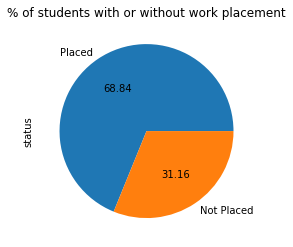

In [6]:
data_col['status'].value_counts().plot(kind='pie',autopct='%.2f',title='% of students with or without work placement')

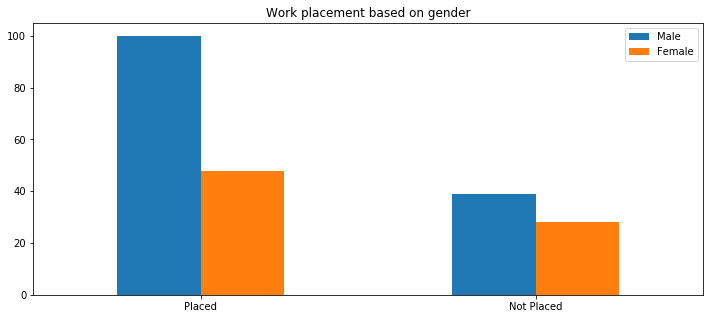

In [7]:
placed = data_col[data_col['status']=='Placed']['gender'].value_counts().tolist()
notplaced = data_col[data_col['status']=='Not Placed']['gender'].value_counts().tolist()
total = data_col['gender'].value_counts().tolist()
label = ['Male','Female']

dfGender = pd.DataFrame({'Placed':placed,'Not Placed':notplaced},index=label).T
dfGender.plot(kind='bar',title='Work placement based on gender',figsize=(12,5),rot=0)

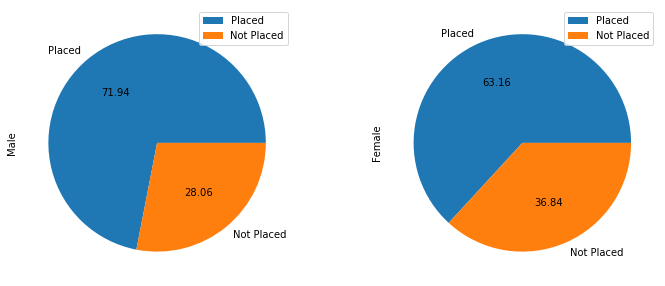

In [8]:
dfGender.plot(kind='pie',subplots=True, figsize=(12,5),autopct = '%.2f')
plt.show()

In a larger sample size, it is evident that male students tend to have a higher probability of getting employed, although female also has a high probability.

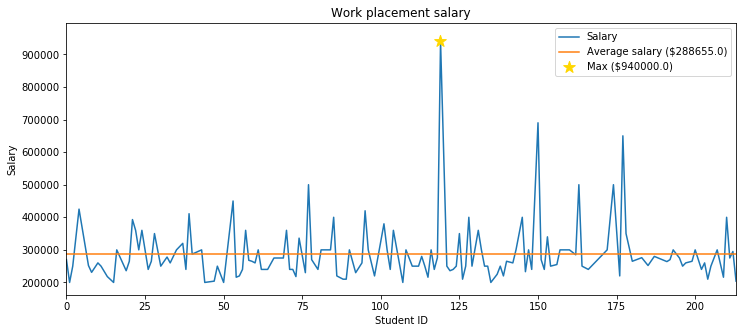

In [9]:
salary = round(data_col[data_col['status']=='Placed']['salary'].mean())


plt.figure(figsize=(12,5))
plt.title('Work placement salary')
data_col[data_col['status']=='Placed']['salary'].plot(kind='line',label='Salary')
plt.plot([0,216],[salary,salary], label=f'Average salary (${salary})')
plt.scatter(data_col[data_col['salary']==data_col['salary'].max()].index-0.25, data_col['salary'].max(),label=f'Max (${data_col["salary"].max()})',marker='*',s=150,c='gold',zorder=5)
plt.ylabel('Salary')
plt.xlabel('Student ID')
plt.legend()
plt.show()

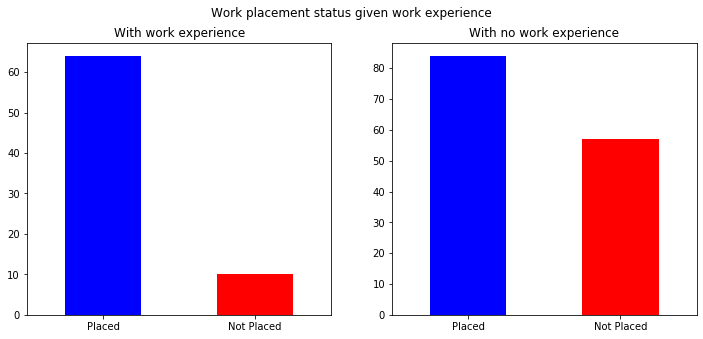

In [10]:
plt.figure(figsize=(12,5))
plt.suptitle('Work placement status given work experience')
plt.subplot(121)
plt.title('With work experience')
data_col[data_col['workex']=='Yes']['status'].value_counts().plot(kind='bar',color=['blue','red'],rot=0)
plt.subplot(122)
plt.title('With no work experience')
data_col[data_col['workex']=='No']['status'].value_counts().plot(kind='bar',color=['blue','red'],rot=0)
plt.show()

In [11]:
data_col = data_col.drop(columns=['sl_no'])

In [12]:
numerical = ['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']
category = [i for i in data_col.columns if i not in numerical]

num_data = data_col[numerical].copy()
cat_data = data_col[category].copy()

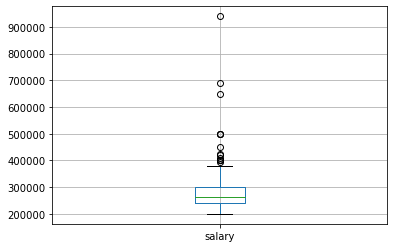

In [13]:
num_data.boxplot(column=numerical.pop())
plt.show()

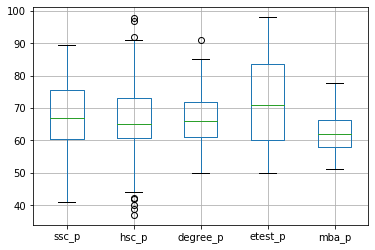

In [14]:
num_data.boxplot(column=numerical)
plt.show()

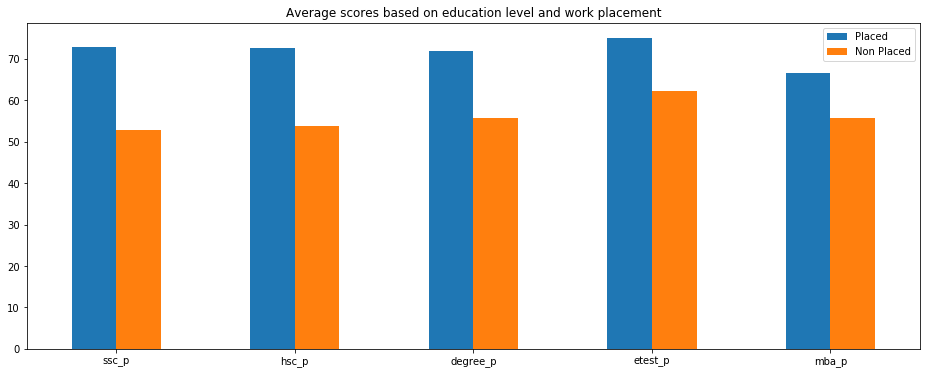

In [15]:
score_mean_placed = data_col[data_col['status']=='Placed'][numerical].describe().mean()
score_mean_non_placed = data_col[data_col['status']=='Not Placed'][numerical].describe().mean()

score = pd.DataFrame({'Placed':score_mean_placed,'Non Placed':score_mean_non_placed})

score.plot(kind='bar',figsize=(16,6),rot=0,title='Average scores based on education level and work placement')

Non placed students have lower average scores than students with work placement

### Will students' secondary school location affect their high school location?

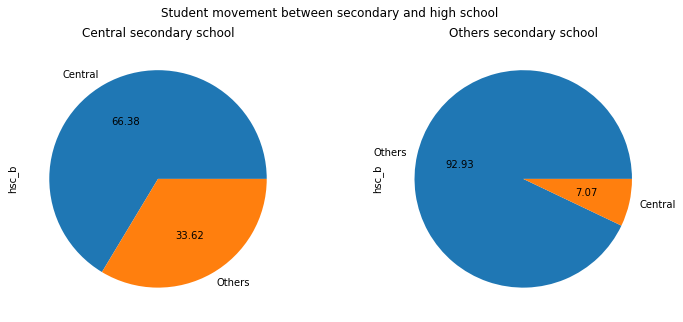

In [16]:
plt.figure(figsize=(12,5))
plt.suptitle('Student movement between secondary and high school')
plt.subplot(121)
data_col[data_col['ssc_b']=='Central']['hsc_b'].value_counts().plot(kind='pie',autopct='%.2f',title='Central secondary school')
plt.subplot(122)
data_col[data_col['ssc_b']=='Others']['hsc_b'].value_counts().plot(kind='pie',autopct='%.2f',title='Others secondary school')
plt.show()

Student who went Central location for secondary school has a higher chance of moving to other areas for highschool. Whereas, secondary school students in other area has a higher retention rate.

### Student school location effect on work placement possibility

In [17]:
def location(sec,high,types):
    if types == 'bar':
        data_col[(data_col['ssc_b']==sec)&(data_col['hsc_b']==high)]['status'].value_counts().plot(kind='bar',title=f'Secondary: {sec}, High: {high}',rot=0,yticks=np.arange(0,70,5),color=['red','green'])
    elif types == 'pie':
        data_col[(data_col['ssc_b']==sec)&(data_col['hsc_b']==high)]['status'].value_counts().plot(kind='pie',autopct='%.2f',title=f'Secondary: {sec}, High: {high}')

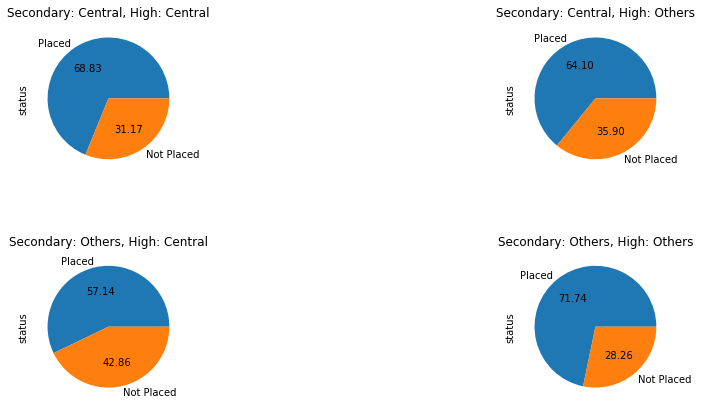

In [18]:
plt.figure(figsize=(16,7))
plt.subplots_adjust(hspace=0.5)
plt.subplot(221)
location('Central','Central','pie')
plt.subplot(222)
location('Central','Others','pie')
plt.subplot(223)
location('Others','Central','pie')
plt.subplot(224)
location('Others','Others','pie')
plt.show()

In terms of percentage, the highest amount of students not getting work placement is if they went to secondary school in other location and high school in central.

In contrast, students who went to other locations for both secondary and high school has the highest employability rate. 

Let's check this data based on actual numbers rather than percentage to verify whether we can make further decision in regards to school's location feature.

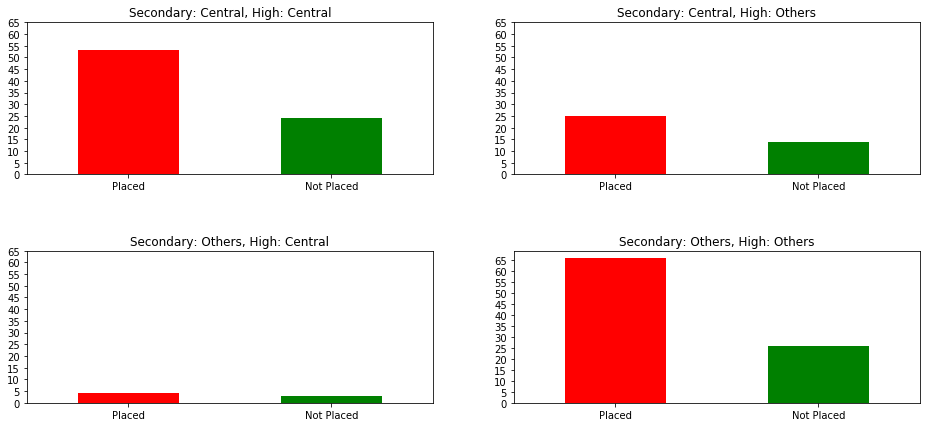

In [19]:
plt.figure(figsize=(16,7))
plt.subplots_adjust(hspace=0.5)
plt.subplot(221)
location('Central','Central','bar')
plt.subplot(222)
location('Central','Others','bar')
plt.subplot(223)
location('Others','Central','bar')
plt.subplot(224)
location('Others','Others','bar')
plt.show()

Students who went from other location to central have a very low sample size (less than 10 combined). 

This means that student relocation does not necessarily affect student's employability chances down the line.

### Will students' high school degree preference impact their college degree?

In [20]:
hscDegree = data_col['hsc_s'].value_counts().index.tolist()

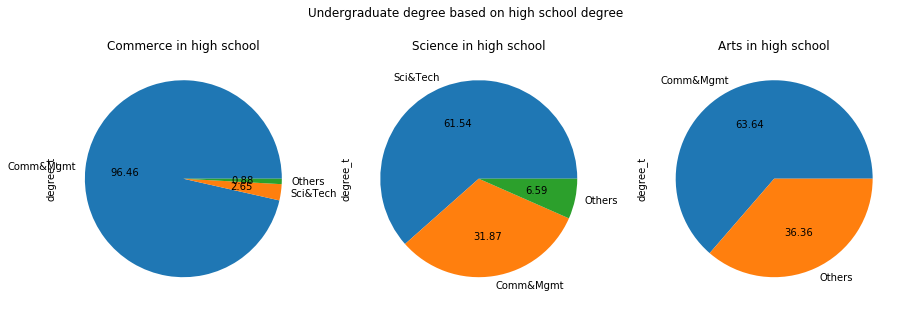

In [21]:
plt.figure(figsize=(15,5))
plt.suptitle('Undergraduate degree based on high school degree')
for degree in range(len(hscDegree)):
    plt.subplot(1,3,degree+1)
    data_col[data_col['hsc_s']==hscDegree[degree]]['degree_t'].value_counts().plot(kind='pie',title=f'{hscDegree[degree]} in high school',autopct='%.2f')

Students with commerce degree in high school have a higher chance to study commerce again in college. 
On the other hand, high school art degree has the lowest retaining percentage in college.

Student with art and commerce major in high school have little to no chance of taking science & technology major in university.

### Student employability based on their high school degree

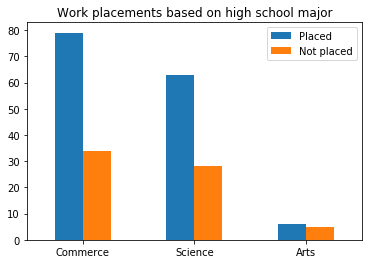

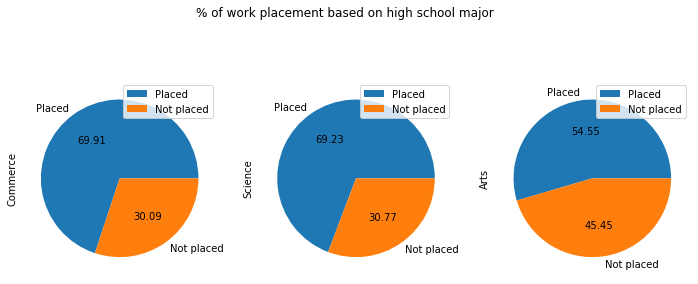

In [22]:
hscWork = []
hscNowork = []
for degree in hscDegree:
    hscWork.append(data_col[data_col['hsc_s'] == degree]['status'].value_counts()[0])
    hscNowork.append(data_col[data_col['hsc_s'] == degree]['status'].value_counts()[1])

hscData = pd.DataFrame({'Placed': hscWork, 'Not placed': hscNowork},index=hscDegree)

hscData.plot(kind='bar' ,rot=0, title = 'Work placements based on high school major')

hscData.T.plot(kind='pie',subplots=True,figsize=(12,5),autopct='%.2f', title = '% of work placement based on high school major')
plt.show()

In general, regardless of their major in high school, students have a high chance (more than 50%) of getting employed.

High school major have little to no effect on employability.

### Student employability based on their college degree

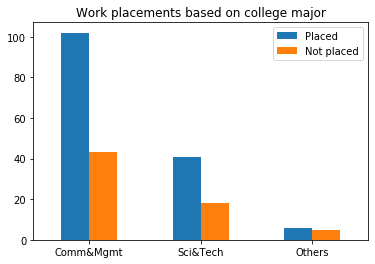

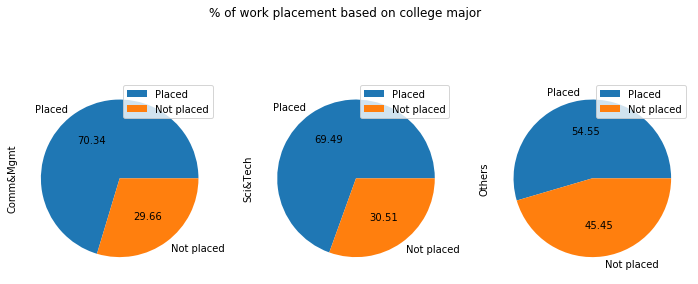

In [23]:
collDegree = data_col['degree_t'].value_counts().index.tolist()

collWork = []
collNowork = []

for degree in collDegree:
    collWork.append(data_col[data_col['degree_t'] == degree]['status'].value_counts()[0])
    collNowork.append(data_col[data_col['degree_t'] == degree]['status'].value_counts()[1])

collData = pd.DataFrame({'Placed': collWork, 'Not placed': collNowork},index=collDegree)

collData.plot(kind='bar',rot=0, title = 'Work placements based on college major')

collData.T.plot(kind='pie',subplots=True,figsize=(12,5),autopct='%.2f', title = '% of work placement based on college major')
plt.show()

Similar to high school major, regardless of their major in college, students have a high probability of getting employed.

College degree not really affectin employability.

### What affects students' specialisation in MBA?

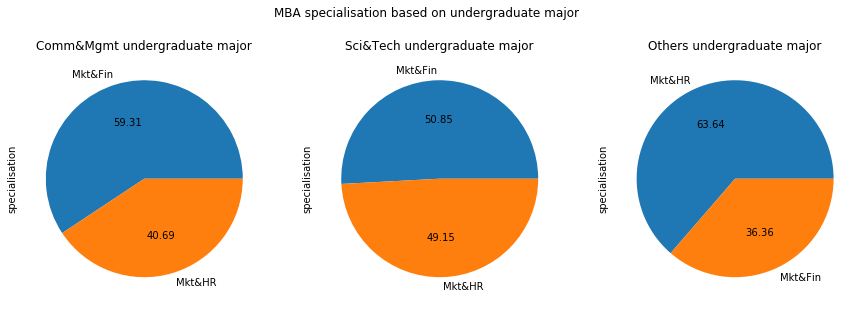

In [24]:
plt.figure(figsize=(15,5))
plt.suptitle('MBA specialisation based on undergraduate major')
for degree in range(len(collDegree)):
    plt.subplot(1,3,degree+1)
    data_col[data_col['degree_t']==collDegree[degree]]['specialisation'].value_counts().plot(kind='pie',title=f'{collDegree[degree]} undergraduate major',autopct='%.2f')

Majority of students from business and science undergraduate background will specialize in Marketing and Finance in their MBA studies. In contrast, students from other undergraduate major will specialize in Marketing and HR.

Majority of students from business and science undergraduate background will specialize in Marketing and Finance in their MBA studies. In contrast, students from other undergraduate major will specialize in Marketing and HR.

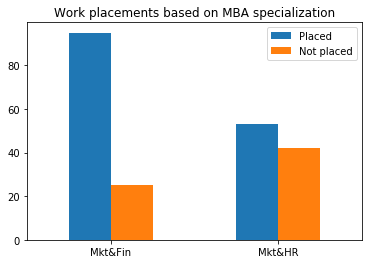

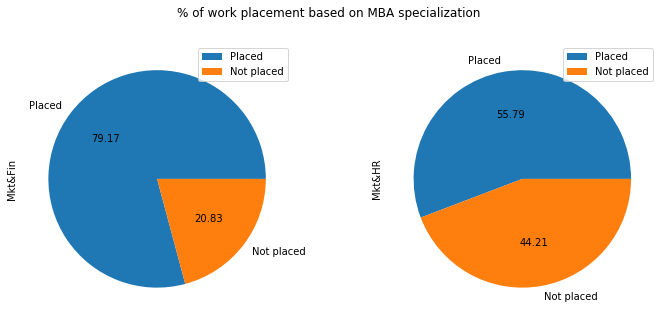

In [25]:
special = data_col['specialisation'].value_counts().index.tolist()

specialWork = []
specialNowork = []

for degree in special:
    specialWork.append(data_col[data_col['specialisation'] == degree]['status'].value_counts()[0])
    specialNowork.append(data_col[data_col['specialisation'] == degree]['status'].value_counts()[1])

specialData = pd.DataFrame({'Placed' : specialWork, 'Not placed': specialNowork}, index=special)

specialData.plot(kind='bar', rot = 0, title = 'Work placements based on MBA specialization')

specialData.T.plot(kind = 'pie', subplots = True, figsize = (12,5), autopct = '%.2f', title = '% of work placement based on MBA specialization')
plt.show()

Student's MBA specialization have a significant effect of employability.

In [26]:
data_col['status'].replace({'Placed':1, 'Not Placed':0}, inplace = True)

num = numerical
num.append('status')

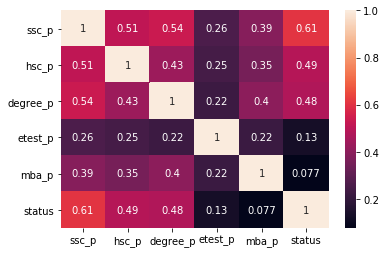

In [27]:
ax = sb.heatmap(data_col[num].corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Employability test and MBA scores have a very low correlation with employability.

### Drop unnecessary feature

In [28]:
data_col.drop(columns=['salary','etest_p','mba_p','ssc_b','hsc_b','hsc_s','degree_t'],inplace=True)

In [29]:
data_col

gender  ssc_p  hsc_p  degree_p workex specialisation  status
0        M  67.00  91.00     58.00     No         Mkt&HR       1
1        M  79.33  78.33     77.48    Yes        Mkt&Fin       1
2        M  65.00  68.00     64.00     No        Mkt&Fin       1
3        M  56.00  52.00     52.00     No         Mkt&HR       0
4        M  85.80  73.60     73.30     No        Mkt&Fin       1
..     ...    ...    ...       ...    ...            ...     ...
210      M  80.60  82.00     77.60     No        Mkt&Fin       1
211      M  58.00  60.00     72.00     No        Mkt&Fin       1
212      M  67.00  67.00     73.00    Yes        Mkt&Fin       1
213      F  74.00  66.00     58.00     No         Mkt&HR       1
214      M  62.00  58.00     53.00     No         Mkt&HR       0

[215 rows x 7 columns]

In [30]:
genderDummies = pd.get_dummies(data_col['gender'], prefix = 'gender')
workexDummies = pd.get_dummies(data_col['workex'], prefix = 'workex')
specialDummies = pd.get_dummies(data_col['specialisation'], prefix='special')

In [31]:
newData = pd.concat([data_col, genderDummies, workexDummies, specialDummies], axis = 1)

In [32]:
newData = newData.drop(columns=['gender','workex','specialisation'])

In [33]:
newData

ssc_p  hsc_p  degree_p  status  gender_F  gender_M  workex_No  \
0    67.00  91.00     58.00       1         0         1          1   
1    79.33  78.33     77.48       1         0         1          0   
2    65.00  68.00     64.00       1         0         1          1   
3    56.00  52.00     52.00       0         0         1          1   
4    85.80  73.60     73.30       1         0         1          1   
..     ...    ...       ...     ...       ...       ...        ...   
210  80.60  82.00     77.60       1         0         1          1   
211  58.00  60.00     72.00       1         0         1          1   
212  67.00  67.00     73.00       1         0         1          0   
213  74.00  66.00     58.00       1         1         0          1   
214  62.00  58.00     53.00       0         0         1          1   

     workex_Yes  special_Mkt&Fin  special_Mkt&HR  
0             0                0               1  
1             1                1               0  
2             0                1               0  
3             0                0               1  
4             0                1               0  
..          ...              ...             ...  
210           0                1               0  
211           0                1               0  
212           1                1               0  
213           0                0               1  
214           0                0               1  

[215 rows x 10 columns]

In [34]:
x = newData.drop(columns=['status'])
y = newData['status']

In [39]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state = 42)

In [40]:
dfY_train = pd.DataFrame(yTrain)
dfY_test = pd.DataFrame(yTest)

In [41]:
trainData = pd.concat([xTrain, dfY_train],axis=1)
testData = pd.concat([xTest, dfY_test], axis=1)

In [42]:
trainData.to_csv('train.csv',index=False)
testData.to_csv('test.csv', index=False)